Мышковец С.А., v.01 16.10.2022

Решение задачи: Подготовить данные для этапа моделирования (обучения)

1. Анализ данных, необходимые корректировки. 
2. Обработать пропуски. 
3. Оценить выбросы. 
4. Корреляция. 
5. Тест на нормальность распределения.
6. Масштабировать и стандартизировать данные.
7. Разделите данные на тренировочную и тестовую выборку.
8. При обработке пропусков/выбросов/скалировании тестовую и тренировачную выборку обрабатывать отдельно.

Вывод:
    1. Чистить категориальные данные проще в Excel.
    2. Ярко выраженных связей между атрибутами БД не выявлено.


Замечания преподавателя:
    
    1. В процессе обучения (а это можно выяснить только обучив модель) мы выяснили что очистку делать не нужно 
    2. Редко встречаемые данные можно заменить по порогу на одно значение (например города которые встречаются реже чем 70 раз) 
    3. Скалирование тут так же спорное решение 
    4. Не нашел про дубликаты (их обработку) 
    5. В конце перед разбивкой стоит делать например get_dummies (pandas) или то что я сбросил так как модели не работают с категориальными данными (текстом). 

# Анализ данных, необходимые корректировки.

In [4]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 50)
df = pd.read_csv("credit_train.csv", sep= ';')

In [5]:
df.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [6]:
df.describe()

,client_id,age,credit_month,tariff_id,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170743.000000,170746.000000,170746.000000,170741.000000,161516.000000,161516.000000,170746.000000
mean,85373.500000,36.497262,10.980749,1.323900,40138.596149,2.107308,0.046070,0.176028
std,49290.268869,10.546044,3.536698,0.235813,25044.373992,1.777128,0.211548,0.380845
min,1.000000,18.000000,3.000000,1.000000,5000.000000,0.000000,0.000000,0.000000
25%,42687.250000,28.000000,10.000000,1.100000,25000.000000,1.000000,0.000000,0.000000
50%,85373.500000,34.000000,10.000000,1.320000,35000.000000,2.000000,0.000000,0.000000
75%,128059.750000,43.000000,12.000000,1.600000,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,71.000000,36.000000,1.960000,950000.000000,21.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  object 
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [8]:
df.isna().sum()

client_id                  0
gender                     0
age                        3
marital_status             3
job_position               0
credit_sum                 2
credit_month               0
tariff_id                  0
score_shk                  7
education                  5
living_region            192
monthly_income             5
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
dtype: int64

In [9]:
df = df.dropna(subset=['age','marital_status', 'education', 'score_shk', 'living_region', 'monthly_income'])
df = df.reset_index(drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170543 entries, 0 to 170542
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170543 non-null  int64  
 1   gender                170543 non-null  object 
 2   age                   170543 non-null  float64
 3   marital_status        170543 non-null  object 
 4   job_position          170543 non-null  object 
 5   credit_sum            170543 non-null  object 
 6   credit_month          170543 non-null  int64  
 7   tariff_id             170543 non-null  float64
 8   score_shk             170543 non-null  object 
 9   education             170543 non-null  object 
 10  living_region         170543 non-null  object 
 11  monthly_income        170543 non-null  float64
 12  credit_count          161331 non-null  float64
 13  overdue_credit_count  161331 non-null  float64
 14  open_account_flg      170543 non-null  int64  
dtype

In [11]:
df.describe()

,client_id,age,credit_month,tariff_id,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170543.000000,170543.000000,170543.000000,170543.000000,170543.000000,161331.000000,161331.000000,170543.000000
mean,85380.561143,36.499845,10.980990,1.323910,40136.940508,2.107537,0.046061,0.176237
std,49287.246838,10.547081,3.537248,0.235824,25046.924003,1.777382,0.211501,0.381023
min,8.000000,18.000000,3.000000,1.000000,5000.000000,0.000000,0.000000,0.000000
25%,42701.500000,28.000000,10.000000,1.100000,25000.000000,1.000000,0.000000,0.000000
50%,85377.000000,34.000000,10.000000,1.320000,35000.000000,2.000000,0.000000,0.000000
75%,128066.500000,43.000000,12.000000,1.600000,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,71.000000,36.000000,1.960000,950000.000000,21.000000,3.000000,1.000000


In [12]:
df['credit_sum'] = df['credit_sum'].apply(lambda x: x.replace(',','.'))
df['credit_sum'] = df['credit_sum'].astype(float)

In [13]:
df['score_shk'] = df['score_shk'].apply(lambda x: x.replace(',','.'))
df['score_shk'] = df['score_shk'].astype(float)

In [14]:
df.head(2)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,8,F,26.0,UNM,SPC,47878.0,10,1.1,0.512525,GRD,МОСКОВСКАЯ ОБЛ,60000.0,3.0,0.0,0
1,10,F,32.0,UNM,SPC,26268.0,10,1.1,0.465026,GRD,КРАЙ СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170543 entries, 0 to 170542
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170543 non-null  int64  
 1   gender                170543 non-null  object 
 2   age                   170543 non-null  float64
 3   marital_status        170543 non-null  object 
 4   job_position          170543 non-null  object 
 5   credit_sum            170543 non-null  float64
 6   credit_month          170543 non-null  int64  
 7   tariff_id             170543 non-null  float64
 8   score_shk             170543 non-null  float64
 9   education             170543 non-null  object 
 10  living_region         170543 non-null  object 
 11  monthly_income        170543 non-null  float64
 12  credit_count          161331 non-null  float64
 13  overdue_credit_count  161331 non-null  float64
 14  open_account_flg      170543 non-null  int64  
dtype

In [16]:
len(df['living_region'].sort_values().unique())

301

In [17]:
df1 = pd.read_excel("Субъекты РФ.xlsx")

In [18]:
df1['Плотность населения'] = df1['Население']/df1['Площадь']

In [19]:
df1

,№,Субъект РФ,Субъект РФ кратко,Вид субъекта,Площадь,Население,Административный центр,"Расстояние до Москвы, км",Федеральный округ,Плотность населения
0,1,Республика Адыгея,Адыгея,Республика,7792.0,496934.0,Майкоп,1409.0,Южный федеральный округ,63.774897
1,2,Республика Алтай,Алтай,Республика,92903.0,210924.0,Горно-Алтайск,3851.0,Сибирский федеральный округ,2.270368
2,3,Республика Башкортостан,Башкортостан,Республика,142947.0,4091423.0,Уфа,1391.0,Приволжский федеральный округ,28.621958
3,4,Республика Бурятия,Бурятия,Республика,351334.0,978588.0,Улан-Удэ,6555.0,Дальневосточный федеральный округ,2.785350
4,5,Республика Дагестан,Дагестан,Республика,50270.0,3182054.0,Махачкала,1899.0,Северо-Кавказский федеральный округ,63.299264
...,...,...,...,...,...,...,...,...,...,...
84,85,Ямало-Ненецкий автономный округ,Ямало-Ненецкий,АО,769250.0,510490.0,Салехард,1933.0,Уральский федеральный округ,0.663620
85,86,Еврейская автономная область,Еврейская,АО,36266.0,150453.0,Биробиджан,8228.0,Дальневосточный федеральный округ,4.148596
86,87,Москва,Москва,Город федерального значения,2511.0,13010112.0,Москва,0.0,Центральный федеральный округ,5181.247312
87,88,Санкт-Петербург,Санкт-Петербург,Город федерального значения,1399.0,5601911.0,Санкт-Петербург,703.0,Северо-Западный федеральный округ,4004.225161


In [20]:
df.groupby("living_region")["client_id"].count().sort_values()

living_region
74                         1
РЕСПУБЛИКА ХАКАСИЯ         1
РЕСПУБЛИКАТАТАРСТАН        1
МАГАДАНСКАЯ ОБЛАСТЬ        1
САХА /ЯКУТИЯ/              1
                       ...  
ТАТАРСТАН РЕСП          5187
МОСКВА                  5528
САНКТ-ПЕТЕРБУРГ         5632
КРАСНОДАРСКИЙ КРАЙ      7456
ОБЛ МОСКОВСКАЯ         12228
Name: client_id, Length: 301, dtype: int64

In [21]:
df.drop(df[df["living_region"] == '74'].index, inplace = True)

In [22]:
df.drop(df[df["living_region"] == '98'].index, inplace = True)

In [23]:
df["living_region"] = df["living_region"].replace("ОБЛАСТЬ", "ОБЛ", regex=True)

In [24]:
df['living_region'].sort_values().unique()

array(['АДЫГЕЯ РЕСП', 'АЛТАЙСКИЙ', 'АЛТАЙСКИЙ КРАЙ', 'АМУРСКАЯ ОБЛ',
       'АО НЕНЕЦКИЙ', 'АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю',
       'АО ЯМАЛО-НЕНЕЦКИЙ', 'АОБЛ ЕВРЕЙСКАЯ', 'АРХАНГЕЛЬСКАЯ',
       'АРХАНГЕЛЬСКАЯ ОБЛ', 'АСТРАХАНСКАЯ', 'АСТРАХАНСКАЯ ОБЛ',
       'БАШКОРТОСТАН', 'БАШКОРТОСТАН РЕСП', 'БЕЛГОРОДСКАЯ ОБЛ',
       'БРЯНСКАЯ ОБЛ', 'БРЯНСКИЙ', 'БУРЯТИЯ', 'БУРЯТИЯ РЕСП',
       'ВЛАДИМИРСКАЯ ОБЛ', 'ВОЛГОГРАДСКАЯ ОБЛ', 'ВОЛОГОДСКАЯ',
       'ВОЛОГОДСКАЯ ОБЛ', 'ВОЛОГОДСКАЯ ОБЛ.', 'ВОРОНЕЖСКАЯ ОБЛ',
       'Г МОСКВА', 'Г. МОСКВА', 'Г. САНКТ-ПЕТЕРБУРГ', 'Г.МОСКВА',
       'Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ', 'ГОРЬКОВСКАЯ ОБЛ',
       'ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н', 'ДАГЕСТАН РЕСП', 'ДАЛЬНИЙ ВОСТОК',
       'ЕВРЕЙСКАЯ АВТОНОМНАЯ', 'ЕВРЕЙСКАЯ АОБЛ', 'ЗАБАЙКАЛЬСКИЙ КРАЙ',
       'ИВАНОВСКАЯ ОБЛ', 'ИНГУШЕТИЯ РЕСП', 'ИРКУТСКАЯ ОБЛ',
       'КАБАРДИНО-БАЛКАРСКАЯ', 'КАБАРДИНО-БАЛКАРСКАЯ РЕСП',
       'КАЛИНИНГРАДСКАЯ ОБЛ', 'КАЛИНИНГРАДСКАЯ ОБЛ.', 'КАЛМЫКИЯ',
       'КАЛМЫКИЯ РЕСП', 'КАЛУЖСКАЯ', 'КА

In [25]:
df["living_region"] = df["living_region"].replace("РЕСПУБЛИКА", "РЕСП", regex=True)

In [26]:
df["living_region"] = df["living_region"].replace("МЫТИЩИНСКИЙ Р-Н", "МОСКОВСКАЯ ОБЛ", regex=True)

In [27]:
df["living_region"] = df["living_region"].replace("Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ", "МОСКОВСКАЯ ОБЛ", regex=True)

In [28]:
df["living_region"] = df["living_region"].replace("ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н", "МОСКОВСКАЯ ОБЛ", regex=True)

In [29]:
df["living_region"] = df["living_region"].replace("РЕСПТАТАРСТАН", "ТАТАРСТАН", regex=True)

In [30]:
for a in df['living_region']:
    if 'ОБЛ' in a and a[0:3] == 'ОБЛ':
        a_new = a[4:] + ' ОБЛ'
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)

In [31]:
for a in df['living_region']:
    if 'РЕСП' in a and a[0:4] == 'РЕСП':
        a_new = a[5:] + ' РЕСП'
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)

In [32]:
for a in df['living_region']:
    if 'АО' in a and a[0:2] == 'АО':
        a_new = a[3:] + ' АО'
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)

In [33]:
for a in df['living_region']:
    if 'КРАЙ' in a and a[0:4] == 'КРАЙ':
        a_new = a[5:] + ' КРАЙ'
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)

In [34]:
for a in df['living_region']:
    if 'Г.' in a and a[0:2] == 'Г.':
        a_new = a[2:]
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)
    if 'Г.' in a.rstrip() and a[-2:] == 'Г.':
        a_new = a[:-2]
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)
    if 'Г ' in a and a[0:2] == 'Г ':
        a_new = a[2:]
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)
    if 'Г' in a.strip() and a[-1] == 'Г':
        a_new = a[:-1]
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)  

In [35]:
for a in df['living_region']:
    if a[0] == ' ' or a[-1]== ' ':
        df['living_region'].replace(to_replace=a, value = a.strip(), inplace= True)

In [36]:
for a in df['living_region']:
    if 'РЕСП' in a:
        a_new = a[:-4]
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)
    if 'ОБЛ' in a:
        a_new = a[:-3]
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)
    if 'АО' in a:
        a_new = a[:-2]
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)
    if 'КРАЙ' in a:
        a_new = (a[:-4])
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)
    if 'АО' in a:
        a_new = (a[:-2])
        df['living_region'].replace(to_replace=a, value = a_new, inplace= True)

In [37]:
for a in df['living_region']:
    if a[0] == ' ' or a[-1]== ' ':
        df['living_region'].replace(to_replace=a, value = a.strip(), inplace= True)

In [38]:
df['living_region'].sort_values().unique()

array(['АДЫГЕЯ', 'АЛТАЙ', 'АЛТАЙСКИЙ', 'АМУРСКАЯ', 'АРХАНГЕЛЬСКАЯ',
       'АСТРАХАНСКАЯ', 'БАШКОРТОСТАН', 'БЕЛГОРОДСКАЯ', 'БРЯНСКАЯ',
       'БРЯНСКИЙ', 'БУРЯТИЯ', 'ВЛАДИМИРСКАЯ', 'ВОЛГОГРАДСКАЯ',
       'ВОЛОГОДСКАЯ', 'ВОЛОГОДСКАЯ О', 'ВОРОНЕЖСКАЯ', 'ГОРЬКОВСКАЯ',
       'ДАГЕСТАН', 'ДАЛЬНИЙ ВОСТОК', 'ЕВРЕЙСКАЯ А',
       'ЕВРЕЙСКАЯ АВТОНОМНАЯ', 'ЗАБАЙКАЛЬСКИЙ', 'ИВАНОВСКАЯ', 'ИНГУШЕТИЯ',
       'ИРКУТСКАЯ', 'КАБАРДИНО-БАЛКАРСКАЯ', 'КАЛИНИНГРАДСКАЯ',
       'КАЛИНИНГРАДСКАЯ О', 'КАЛМЫКИЯ', 'КАЛУЖСКАЯ', 'КАМЧАТСКАЯ',
       'КАМЧАТСКИЙ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАРЕЛИЯ', 'КЕМЕРОВСКАЯ',
       'КИРОВСКАЯ', 'КОМИ', 'КОСТРОМСКАЯ', 'КРАСНОДАРСКИЙ',
       'КРАСНОЯРСКИЙ', 'КУРГАНСКАЯ', 'КУРСКАЯ', 'Л ЕВРЕЙСКАЯ',
       'ЛЕНИНГРАДСКАЯ', 'ЛИПЕЦКАЯ', 'МАГАДАНСКАЯ', 'МАРИЙ ЭЛ', 'МОРДОВИЯ',
       'МОСКВА', 'МОСКВОСКАЯ', 'МОСКОВСКАЯ', 'МУРМАНСКАЯ', 'НЕНЕЦКИЙ',
       'НИЖЕГОРОДСКАЯ', 'НОВГОРОДСКАЯ', 'НОВОСИБИРСКАЯ', 'ОМСКАЯ', 'ОРЁЛ',
       'ОРЕНБУРГСКАЯ', 'ОРЛОВСКАЯ', 'ПЕНЗЕНСКАЯ', 'ПЕРМСКАЯ',

In [39]:
df["living_region"] = df["living_region"].replace("БРЯНСКИЙ", "БРЯНСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("ВОЛОГОДСКАЯ О", "ВОЛОГОДСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("ГОРЬКОВСКАЯ", "НИЖЕГОРОДСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("ЕВРЕЙСКАЯ А", "ЕВРЕЙСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("ЕВРЕЙСКАЯВТОНОМНАЯ", "ЕВРЕЙСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("КАЛИНИНГРАДСКАЯ О", "КАЛИНИНГРАДСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("КАМЧАТСКАЯ", "КАМЧАТСКИЙ", regex=True)
df["living_region"] = df["living_region"].replace("Л ЕВРЕЙСКАЯ", "ЕВРЕЙСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("МОСКВОСКАЯ", "МОСКОВСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("ОРЁЛ", "ОРЛОВСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("ПЕРМСКАЯ", "ПЕРМСКИЙ", regex=True)
df["living_region"] = df["living_region"].replace("САНКТ-ПЕТЕРБУР", "САНКТ-ПЕТЕРБУРГ", regex=True)
df["living_region"] = df["living_region"].replace('САХА (ЯКУТИЯ)', 'САХА (ЯКУТИЯ)', regex=True)
df["living_region"] = df["living_region"].replace('САХА /ЯКУТИЯ/', 'САХА (ЯКУТИЯ)', regex=True)
df["living_region"] = df["living_region"].replace("СЕВ. ОСЕТИЯ - АЛАНИЯ", 'АЛАНИЯ', regex=True)
df["living_region"] = df["living_region"].replace('СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ', 'АЛАНИЯ', regex=True)
df["living_region"] = df["living_region"].replace("ЧУВАШИЯ ЧУВАШСКАЯ РЕ", "ЧУВАШСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("ЧУВАШСКАЯ РЕ", "ЧУВАШСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("ЧУВАШСКАЯ - ЧУВАШИЯ", "ЧУВАШСКАЯ", regex=True)
df["living_region"] = df["living_region"].replace("ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю", "ХАНТЫ-МАНСИЙСКИЙ", regex=True)
df["living_region"] = df["living_region"].replace("ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙГРА", "ХАНТЫ-МАНСИЙСКИЙ", regex=True)
df["living_region"] = df["living_region"].replace("ХАНТЫ-МАНСИЙСКИЙГРА", "ХАНТЫ-МАНСИЙСКИЙ", regex=True)
df["living_region"] = df["living_region"].replace("САНКТ-ПЕТЕРБУРГГ", "САНКТ-ПЕТЕРБУРГ", regex=True)
df["living_region"] = df["living_region"].replace("ЧИТИНСКАЯ", "ЗАБАЙКАЛЬСКИЙ", regex=True)
df["living_region"] = df["living_region"].replace("ЭВЕНКИЙСКИЙ", "КРАСНОЯРСКИЙ", regex=True)

In [40]:
df.drop(df[df["living_region"] == 'РОССИЯ'].index, inplace = True)
df.drop(df[df["living_region"] == 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУ'].index, inplace = True)
df.drop(df[df["living_region"] == 'ДАЛЬНИЙ ВОСТОК'].index, inplace = True)

In [41]:
df['living_region'].sort_values().unique()

array(['АДЫГЕЯ', 'АЛАНИЯ', 'АЛТАЙ', 'АЛТАЙСКИЙ', 'АМУРСКАЯ',
       'АРХАНГЕЛЬСКАЯ', 'АСТРАХАНСКАЯ', 'БАШКОРТОСТАН', 'БЕЛГОРОДСКАЯ',
       'БРЯНСКАЯ', 'БУРЯТИЯ', 'ВЛАДИМИРСКАЯ', 'ВОЛГОГРАДСКАЯ',
       'ВОЛОГОДСКАЯ', 'ВОРОНЕЖСКАЯ', 'ДАГЕСТАН', 'ЕВРЕЙСКАЯ',
       'ЗАБАЙКАЛЬСКИЙ', 'ИВАНОВСКАЯ', 'ИНГУШЕТИЯ', 'ИРКУТСКАЯ',
       'КАБАРДИНО-БАЛКАРСКАЯ', 'КАЛИНИНГРАДСКАЯ', 'КАЛМЫКИЯ', 'КАЛУЖСКАЯ',
       'КАМЧАТСКИЙ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАРЕЛИЯ', 'КЕМЕРОВСКАЯ',
       'КИРОВСКАЯ', 'КОМИ', 'КОСТРОМСКАЯ', 'КРАСНОДАРСКИЙ',
       'КРАСНОЯРСКИЙ', 'КУРГАНСКАЯ', 'КУРСКАЯ', 'ЛЕНИНГРАДСКАЯ',
       'ЛИПЕЦКАЯ', 'МАГАДАНСКАЯ', 'МАРИЙ ЭЛ', 'МОРДОВИЯ', 'МОСКВА',
       'МОСКОВСКАЯ', 'МУРМАНСКАЯ', 'НЕНЕЦКИЙ', 'НИЖЕГОРОДСКАЯ',
       'НОВГОРОДСКАЯ', 'НОВОСИБИРСКАЯ', 'ОМСКАЯ', 'ОРЕНБУРГСКАЯ',
       'ОРЛОВСКАЯ', 'ПЕНЗЕНСКАЯ', 'ПЕРМСКИЙ', 'ПРИМОРСКИЙ', 'ПСКОВСКАЯ',
       'РОСТОВСКАЯ', 'РЯЗАНСКАЯ', 'САМАРСКАЯ', 'САНКТ-ПЕТЕРБУРГ',
       'САРАТОВСКАЯ', 'САХА', 'САХА (ЯКУТИЯ)', 'САХАЛИНСКАЯ',
       '

In [42]:
len(df['living_region'].sort_values().unique())

84

# Обработать пропуски.

In [43]:
df['credit_count'] = df['credit_count'].fillna(0)

In [44]:
df['overdue_credit_count'] = df['overdue_credit_count'].fillna(0)

In [45]:
df.describe()

,client_id,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170537.000000,170537.000000,170537.000000,170537.000000,170537.000000,170537.000000,170537.000000,170537.000000,170537.000000,170537.000000
mean,85381.758903,36.499909,26093.930353,10.981013,1.323911,0.469450,40136.757683,1.993726,0.043574,0.176226
std,49286.823904,10.547185,16233.307795,3.537086,0.235826,0.124252,25047.033889,1.793173,0.205976,0.381013
min,8.000000,18.000000,2736.000000,3.000000,1.000000,0.000000,5000.000000,0.000000,0.000000,0.000000
25%,42704.000000,28.000000,14908.000000,10.000000,1.100000,0.379495,25000.000000,1.000000,0.000000,0.000000
50%,85378.000000,34.000000,21229.000000,10.000000,1.320000,0.461599,35000.000000,2.000000,0.000000,0.000000
75%,128067.000000,43.000000,32068.000000,12.000000,1.600000,0.552366,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,71.000000,200000.000000,36.000000,1.960000,1.128291,950000.000000,21.000000,3.000000,1.000000


In [46]:
df1['Субъект РФ кратко'] = df1['Субъект РФ кратко'].str.upper()

In [47]:
df1['Субъект РФ кратко'] = df1['Субъект РФ кратко'].str.strip()

In [48]:
df = df.merge(df1, how = 'left', left_on='living_region', right_on='Субъект РФ кратко')

In [49]:
df = df.drop(columns=['№', 'Вид субъекта', 'Площадь', 'Население', 'Административный центр', 'Субъект РФ кратко', 'living_region'])

In [50]:
df = df.dropna()

# Оценить выбросы.

<AxesSubplot:>

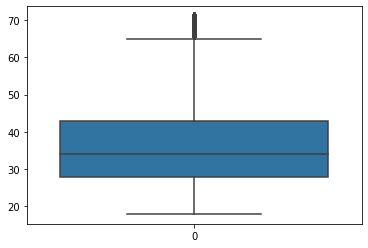

In [51]:
import seaborn as sns
sns.boxplot(data=df['age'], width=0.8)

<AxesSubplot:>

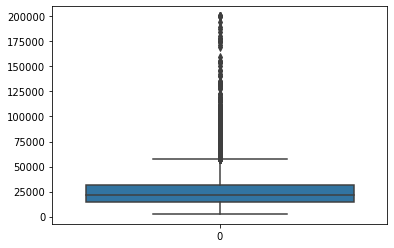

In [52]:
sns.boxplot(data=df['credit_sum'], width=0.8)

<AxesSubplot:>

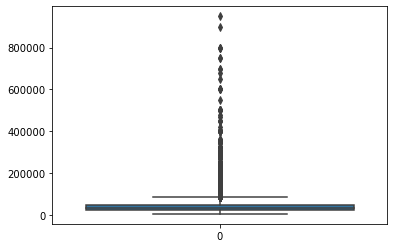

In [53]:
sns.boxplot(data=df['monthly_income'], width=0.8)

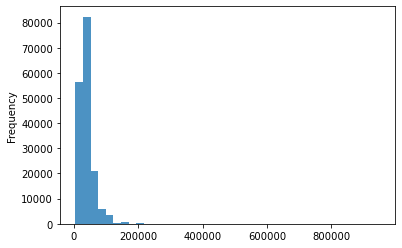

In [54]:
ax = df['monthly_income'].plot.hist(bins=40, alpha=0.8)

<AxesSubplot:>

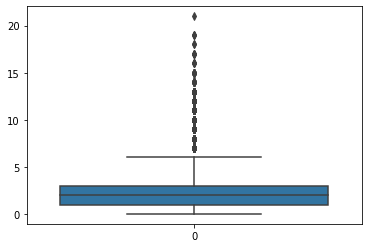

In [55]:
sns.boxplot(data=df['credit_count'], width=0.8)

<AxesSubplot:>

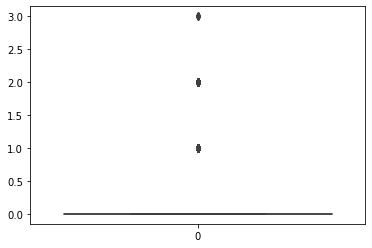

In [56]:
sns.boxplot(data=df['overdue_credit_count'], width=0.8)

Выбираем колонки для удаления выбросов (данных, которые не находятся в пределах 3х стандартных отклонений).

In [57]:
from scipy import stats

In [58]:
df.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'monthly_income', 'credit_count', 'overdue_credit_count',
       'open_account_flg', 'Субъект РФ', 'Расстояние до Москвы, км',
       'Федеральный округ', 'Плотность населения'],
      dtype='object')

In [59]:
df_no_objects = df.drop(['client_id', 'age', 'gender', 'marital_status', 'credit_sum', 'credit_month', 'job_position', 'tariff_id', 'score_shk', 'education', 'overdue_credit_count', 'open_account_flg', 'Субъект РФ', 'Федеральный округ'], axis=1)


In [60]:
z = np.abs(stats.zscore(df_no_objects))

In [61]:
data_clean = df_no_objects[(z<3).all(axis=1)]

<AxesSubplot:>

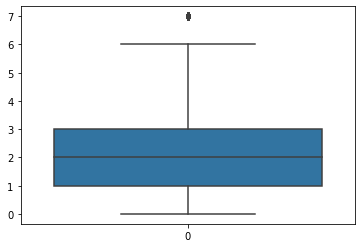

In [62]:
sns.boxplot(data=data_clean['credit_count'], width=0.8)

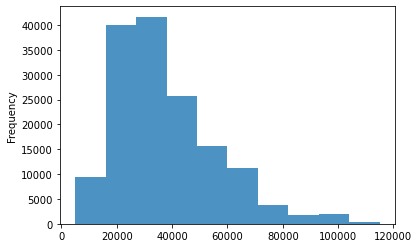

In [63]:
ax = data_clean['monthly_income'].plot.hist(bins=10, alpha=0.8)

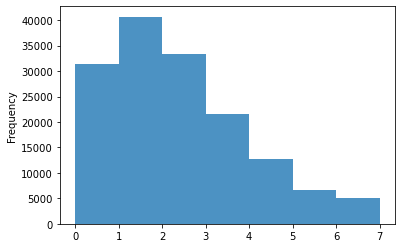

In [64]:
ax = data_clean['credit_count'].plot.hist(bins=7, alpha=0.8)

In [65]:
# delete all rows with column 'credit_count' overe 7 and  'monthly_income' over 120000
rows_to_drop = df[ (df['credit_count'] > 7) | (df['monthly_income'] > 120000) ].index
df.drop(rows_to_drop , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166944 entries, 0 to 170536
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   client_id                 166944 non-null  int64  
 1   gender                    166944 non-null  object 
 2   age                       166944 non-null  float64
 3   marital_status            166944 non-null  object 
 4   job_position              166944 non-null  object 
 5   credit_sum                166944 non-null  float64
 6   credit_month              166944 non-null  int64  
 7   tariff_id                 166944 non-null  float64
 8   score_shk                 166944 non-null  float64
 9   education                 166944 non-null  object 
 10  monthly_income            166944 non-null  float64
 11  credit_count              166944 non-null  float64
 12  overdue_credit_count      166944 non-null  float64
 13  open_account_flg          166944 non-null  i

In [66]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
ord_enc = ord_enc.fit(df[["gender"]])
ord_enc.categories_
df["gender"] = ord_enc.transform(df[["gender"]])


In [67]:
df.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,open_account_flg,Субъект РФ,"Расстояние до Москвы, км",Федеральный округ,Плотность населения
0,8,0.0,26.0,UNM,SPC,47878.0,10,1.1,0.512525,GRD,60000.0,3.0,0.0,0,Московская область,0.0,Центральный федеральный округ,192.087812
1,10,0.0,32.0,UNM,SPC,26268.0,10,1.1,0.465026,GRD,39500.0,7.0,0.0,0,Ставропольский край,1411.0,Северо-Кавказский федеральный округ,43.947899
2,11,1.0,26.0,MAR,SPC,16793.0,14,1.0,0.445430,SCH,36000.0,2.0,0.0,0,Санкт-Петербург,703.0,Северо-Западный федеральный округ,4004.225161
3,13,1.0,37.0,MAR,SPC,42289.0,10,1.6,0.691609,SCH,70000.0,1.0,0.0,0,Архангельская область,1250.0,Северо-Западный федеральный округ,1.729589
4,14,1.0,43.0,MAR,INP,57567.0,10,1.1,0.341164,GRD,60000.0,7.0,0.0,0,Ханты-Мансийский автономный округ – Югра,2622.0,Уральский федеральный округ,3.200218


In [68]:
df.loc[df["marital_status"] == 'CIV', "marital_status"] = 'IN_REL'

In [69]:
df.loc[df["marital_status"] == 'MAR', "marital_status"] = 'IN_REL'

In [70]:
df.loc[df["marital_status"] == 'DIV', "marital_status"] = 'NO_REL'

In [71]:
df.loc[df["marital_status"] == 'UNM', "marital_status"] = 'NO_REL'

In [72]:
df.loc[df["marital_status"] == 'WID', "marital_status"] = 'NO_REL'

In [73]:
ord_enc1 = OrdinalEncoder()
ord_enc1 = ord_enc1.fit(df[["marital_status"]])
df["marital_status"] = ord_enc1.transform(df[["marital_status"]])

In [74]:
ord_enc1.categories_

[array(['IN_REL', 'NO_REL'], dtype=object)]

In [75]:
ord_enc2 = OrdinalEncoder()
ord_enc2 = ord_enc2.fit(df[["job_position"]])
ord_enc2.categories_
df["job_position"] = ord_enc2.transform(df[["job_position"]])

In [76]:
df['education'] = np.where((df['education']=='"SCH"') | (df['education']=='UGR'), "NO_EDU", "EDU")

In [77]:
ord_enc3 = OrdinalEncoder()
ord_enc3 = ord_enc3.fit(df[["education"]])
ord_enc3.categories_
df["education"] = ord_enc3.transform(df[["education"]])

In [78]:
ord_enc3.categories_

[array(['EDU', 'NO_EDU'], dtype=object)]

In [79]:
ord_enc4 = OrdinalEncoder()
ord_enc4 = ord_enc4.fit(df[["Субъект РФ"]])
ord_enc4.categories_
df["Субъект РФ"] = ord_enc4.transform(df[["Субъект РФ"]])

In [80]:
ord_enc5 = OrdinalEncoder()
ord_enc5 = ord_enc5.fit(df[["Федеральный округ"]])
ord_enc5.categories_
df['Федеральный округ'] = ord_enc5.transform(df[["Федеральный округ"]])

In [81]:
df.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,open_account_flg,Субъект РФ,"Расстояние до Москвы, км",Федеральный округ,Плотность населения
0,8,0.0,26.0,1.0,13.0,47878.0,10,1.1,0.512525,0.0,60000.0,3.0,0.0,0,30.0,0.0,6.0,192.087812
1,10,0.0,32.0,1.0,13.0,26268.0,10,1.1,0.465026,0.0,39500.0,7.0,0.0,0,67.0,1411.0,3.0,43.947899
2,11,1.0,26.0,0.0,13.0,16793.0,14,1.0,0.445430,0.0,36000.0,2.0,0.0,0,62.0,703.0,2.0,4004.225161
3,13,1.0,37.0,0.0,13.0,42289.0,10,1.6,0.691609,0.0,70000.0,1.0,0.0,0,2.0,1250.0,2.0,1.729589
4,14,1.0,43.0,0.0,5.0,57567.0,10,1.1,0.341164,0.0,60000.0,7.0,0.0,0,76.0,2622.0,5.0,3.200218


# Корреляция.

In [82]:
df_inco = df.drop(['client_id', 'tariff_id', 'Федеральный округ', 'Субъект РФ'], axis=1)

In [83]:
corr_matrix = df_inco.corr()
corr_matrix

,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,monthly_income,credit_count,overdue_credit_count,open_account_flg,"Расстояние до Москвы, км",Плотность населения
gender,1.000000,-0.124855,-0.083290,-0.020944,0.027877,0.001860,-0.009565,0.019688,0.237161,-0.013204,0.001551,0.045469,-0.028634,0.022404
age,-0.124855,1.000000,-0.128533,-0.110707,-0.101367,0.006513,-0.168046,-0.127015,-0.032569,0.156792,0.015848,-0.033652,0.016392,-0.023011
marital_status,-0.083290,-0.128533,1.000000,0.021989,0.040044,0.001965,0.144999,0.061829,-0.062265,-0.093465,-0.020370,0.065037,0.001628,0.046887
job_position,-0.020944,-0.110707,0.021989,1.000000,-0.037604,-0.009419,0.000617,0.009987,-0.079493,0.004562,-0.001424,-0.029879,0.004030,0.008001
credit_sum,0.027877,-0.101367,0.040044,-0.037604,1.000000,0.230509,0.062531,0.021335,0.370635,-0.005891,-0.008627,-0.072193,-0.007224,0.151442
credit_month,0.001860,0.006513,0.001965,-0.009419,0.230509,1.000000,0.041770,-0.004687,0.006369,0.045706,0.006948,0.024218,0.010157,0.009173
score_shk,-0.009565,-0.168046,0.144999,0.000617,0.062531,0.041770,1.000000,0.059410,-0.105102,-0.141833,0.155198,0.049515,0.039941,-0.056580
education,0.019688,-0.127015,0.061829,0.009987,0.021335,-0.004687,0.059410,1.000000,0.030117,-0.034454,-0.007627,0.005707,-0.023952,0.048404
monthly_income,0.237161,-0.032569,-0.062265,-0.079493,0.370635,0.006369,-0.105102,0.030117,1.000000,0.147607,0.031754,-0.026381,-0.001424,0.261316
credit_count,-0.013204,0.156792,-0.093465,0.004562,-0.005891,0.045706,-0.141833,-0.034454,0.147607,1.000000,0.179291,-0.010110,0.060619,-0.031624


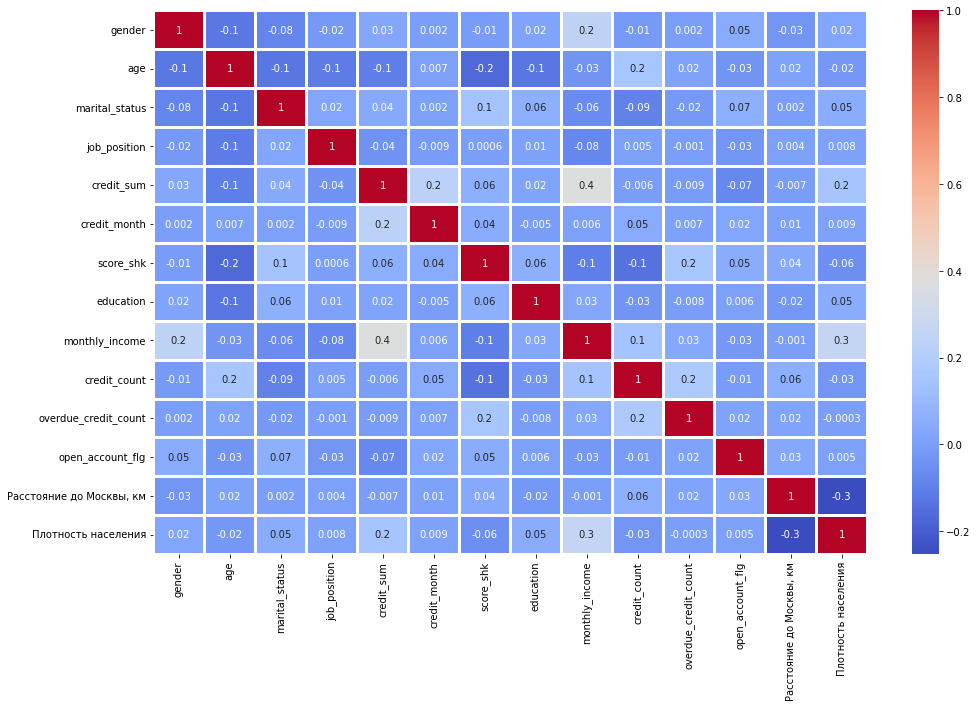

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,10))
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap= 'coolwarm', linewidths=3);

Ярко выраженных связей не выявлено.

# Тест на нормальность распределения.

Тест Шапиро-Уилк

In [85]:
from scipy import stats
import scipy
for a in df.columns:
    stat, p = stats.shapiro(df[a])
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print(f"{a}: 'Принять гипотезу о нормальности'")
    else:
        print(f"{a}: 'Отклонить гипотезу о нормальности'")

Statistics=0.955, p-value=0.000
client_id: 'Отклонить гипотезу о нормальности'
Statistics=0.636, p-value=0.000
gender: 'Отклонить гипотезу о нормальности'
Statistics=0.949, p-value=0.000
age: 'Отклонить гипотезу о нормальности'
Statistics=0.629, p-value=0.000
marital_status: 'Отклонить гипотезу о нормальности'
Statistics=0.405, p-value=0.000
job_position: 'Отклонить гипотезу о нормальности'
Statistics=0.878, p-value=0.000
credit_sum: 'Отклонить гипотезу о нормальности'
Statistics=0.646, p-value=0.000
credit_month: 'Отклонить гипотезу о нормальности'
Statistics=0.841, p-value=0.000
tariff_id: 'Отклонить гипотезу о нормальности'
Statistics=0.994, p-value=0.000
score_shk: 'Отклонить гипотезу о нормальности'
Statistics=0.248, p-value=0.000
education: 'Отклонить гипотезу о нормальности'
Statistics=0.903, p-value=0.000
monthly_income: 'Отклонить гипотезу о нормальности'
Statistics=0.896, p-value=0.000
credit_count: 'Отклонить гипотезу о нормальности'
Statistics=0.199, p-value=0.000
overdue_c

C:\Users\myshk\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Критерий согласия Пирсона

In [86]:
for a in df.columns:
    stat, p = stats.normaltest(df[a])
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print(f"{a}: 'Принять гипотезу о нормальности'")
    else:
        print(f"{a}: 'Отклонить гипотезу о нормальности'")

Statistics=148475.720, p-value=0.000
client_id: 'Отклонить гипотезу о нормальности'
Statistics=571120.503, p-value=0.000
gender: 'Отклонить гипотезу о нормальности'
Statistics=12233.688, p-value=0.000
age: 'Отклонить гипотезу о нормальности'
Statistics=601680.170, p-value=0.000
marital_status: 'Отклонить гипотезу о нормальности'
Statistics=103004.895, p-value=0.000
job_position: 'Отклонить гипотезу о нормальности'
Statistics=42291.649, p-value=0.000
credit_sum: 'Отклонить гипотезу о нормальности'
Statistics=98844.128, p-value=0.000
credit_month: 'Отклонить гипотезу о нормальности'
Statistics=21540.359, p-value=0.000
tariff_id: 'Отклонить гипотезу о нормальности'
Statistics=2330.188, p-value=0.000
score_shk: 'Отклонить гипотезу о нормальности'
Statistics=124588.834, p-value=0.000
education: 'Отклонить гипотезу о нормальности'
Statistics=36708.947, p-value=0.000
monthly_income: 'Отклонить гипотезу о нормальности'
Statistics=16769.051, p-value=0.000
credit_count: 'Отклонить гипотезу о нор

# Масштабировать и стандартизировать данные.

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scalerminmax = MinMaxScaler(feature_range=(-1,1)) 
scaled_df = scaler.fit_transform(df)

In [88]:
scaled_df

array([[-1.73219845, -0.95968442, -0.98746364, ..., -0.86738459,
         0.97189465, -0.22433473],
       [-1.73215787, -0.95968442, -0.4189801 , ..., -0.13714206,
        -0.32302719, -0.3308517 ],
       [-1.73213758,  1.0420092 , -0.98746364, ..., -0.50355717,
        -0.75466781,  2.51670448],
       ...,
       [ 1.73154746, -0.95968442, -0.51372736, ...,  3.88462598,
        -1.61794903, -0.35439479],
       [ 1.73156775, -0.95968442,  1.57071228, ..., -0.53409176,
        -1.18630842, -0.34144808],
       [ 1.73158804,  1.0420092 ,  1.19172325, ..., -0.86738459,
         0.97189465, -0.22433473]])

C:\Users\myshk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


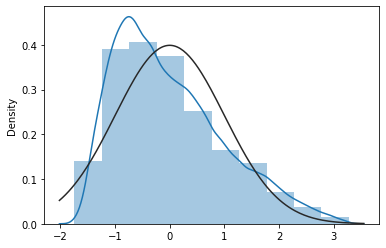

In [89]:
from scipy.stats import norm
sns.distplot(scaled_df[:,2], fit=norm, bins = 10);
# AGE

C:\Users\myshk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


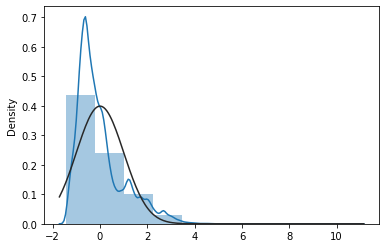

In [90]:
from scipy.stats import norm
sns.distplot(scaled_df[:,5], fit=norm, bins = 10);
# CREDIT_SUM

C:\Users\myshk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


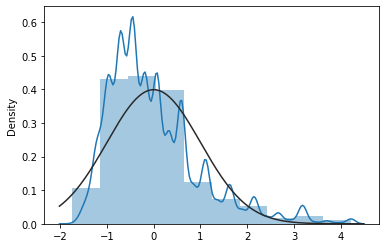

In [91]:
from scipy.stats import norm
sns.distplot(scaled_df[:,10], fit=norm, bins = 10);
# MONTHLY_INCOME

C:\Users\myshk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


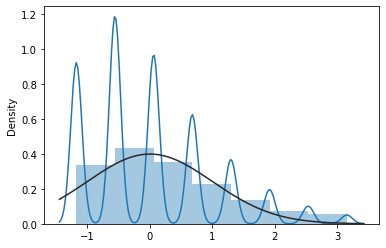

In [92]:
from scipy.stats import norm
sns.distplot(scaled_df[:,11], fit=norm, bins = 7);
# CREDIT_COUNT

# Разделить данные на тренировочную и тестовую выборку.

In [93]:
from sklearn.model_selection import train_test_split

y = df.open_account_flg
X = df.drop(['open_account_flg'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=42, 
                                                    stratify=y)